# Домашнее задание №2

**

## Часть 1. ML workflow (**всего 5 баллов**)

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from itertools import product

### Загрузим данные для работы. 

In [5]:
df = pd.read_csv("/Users/yanik/Downloads/wineQualityReds.csv") # cкопировали путь до csv и прочитали
df.head() # первые пять строк выводим


,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.corr()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
Unnamed: 0,1.000000,-0.268484,-0.008815,-0.153551,-0.031261,-0.119869,0.090480,-0.117850,-0.368372,0.136005,-0.125307,0.245123,0.066453
fixed.acidity,-0.268484,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile.acidity,-0.008815,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric.acid,-0.153551,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual.sugar,-0.031261,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,-0.119869,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free.sulfur.dioxide,0.090480,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total.sulfur.dioxide,-0.117850,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,-0.368372,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,0.136005,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731


In [7]:
df['quality'].value_counts() # для себя чтобы понять количество типов качества

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Будем решать задачу регрессии: необходимо предсказать качество вина на основе его характеристик

### Шаг 1.  (**0.2 балла**)
Создайте матрицу X объект-признак и целевой вектор y ("quality")

In [8]:
#your code here
y = np.array(df['quality']) # создаём массив нампай для вектора y
X = np.array(df.drop(['Unnamed: 0', 'quality'], axis=1)) # массив нампай для матрицы признаков объектов. Каждая строка - признаки каждого объекта. С помощью drop удалили непризнаковые столбцы
print(y) # проверяем, что всё получилось
print(X) # проверяем, что всё получилось

[5 5 5 ... 6 5 6]
[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


### Шаг 2. (**0.2 балла**)
Разбейте данные на train и test (доля тестовых данных - 30%).

In [9]:
from sklearn.model_selection import train_test_split # вижу, что на самом верху уже импортнулось, но вставляю сюда, чтобы показать конкретный использованный метод из sklearn


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # базово создаём train и test выборки через импортированный метод, указывая размер теста в 30%

### Шаг 3. (**0.2 балла**)
Обучите линейную регрессию на тренировочных данных и сделайте предсказания на train и на test.

In [10]:
reg_wine = LinearRegression().fit(X_train, y_train)
pred_train = reg_wine.predict(X_train)
pred_test = reg_wine.predict(X_test)

### Шаг 4. (**0.4 балла**)
Выведите на экран ошибку MSE на train и на test, затем выведите на экран ошибку r2 на train и test.  

In [11]:
print('Train MSE:', mean_squared_error(y_train, pred_train))
print('Test MSE:', mean_squared_error(y_test, pred_test))

print('Train R^2:', r2_score(y_train, pred_train))
print('Test R^2:', r2_score(y_test, pred_test))

Train MSE: 0.3970070947895205
Test MSE: 0.46784831472845056
Train R^2: 0.3946797904419128
Test R^2: 0.2673125040719756


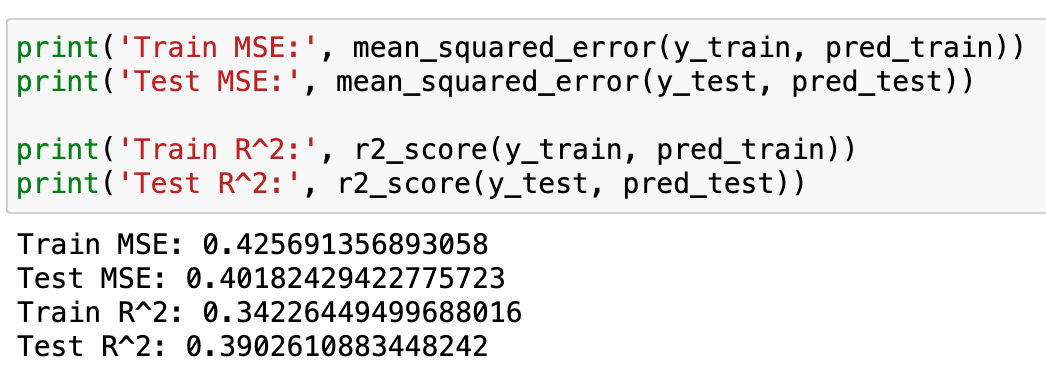

### Шаг 5. (**0.5 балла**)
Вычислите среднее качество (r2) модели на кросс-валидации с k=5 фолдами.

In [12]:
cross_val_wine = cross_val_score(reg_wine, X, y, cv = 5, scoring='r2') # проводим кросс валидацию на 5 фолдах и выписываем метрику r^2 на трейне в каждом фолде, все итерации сохраняются в новую переменную
print(cross_val_wine.mean()) # выводим среднее из массива r^2 по пяти моделям

0.29004162884219953


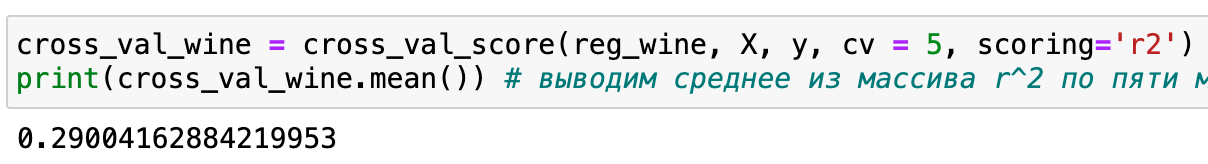

### Шаг 6.  (**0.5 балла**)
Теперь примените линейную регрессию с L1-регуляризацией (Lasso) для данной задачи. Объявите модель и подберите параметр регуляризации alpha по сетке. Ищите alpha в диапазоне (0.1, 1.1) с шагом 0.1. 

Осуществите подбор параметра alpha по тренировочным данным (Xtrain, ytrain).

In [13]:
from sklearn.linear_model import Lasso
alpha_values = np.arange(0.1, 1.2, 0.1) # задаем значения альфа через np.arange
for alpha in alpha_values: # цикл с разными значениями альфа
    lasso_wine = Lasso(alpha=alpha) # задаем регрессию с L1 регуляризацией
    lasso_wine.fit(X_train, y_train) # фитим регрессию с L1 регуляризацией
    res_train=lasso_wine.predict(X_train) # выдаем ответы предсказанные на y по нашему фиту
    print('R^2 при alpha=',alpha, ':', r2_score(y_train, res_train)) # принтим R^2, чтобы потом визуально можно было сравнивать лучший score, чтоб убедиться, что всё нормально работает
    if alpha==0.1: # задаём начальный лучший альфа и score по alpha=0.1
        best_estimator_=0.1 
        best_score_= r2_score(y_train, res_train) 
    if alpha!=0.1: 
        if r2_score(y_train, res_train) >= best_score_: # сравниваем лучший score с новым, если новый лучше, то новая альфа становится лучшей
            best_estimator_=alpha 
            best_score_= r2_score(y_train, res_train) 
    print('Best Alpha:', best_estimator_) # принчу заранее для себя, чтобы убедиться, что код правильно работает
    print('Best R^2 score:', best_score_) 

R^2 при alpha= 0.1 : 0.26672758256516527
Best Alpha: 0.1
Best R^2 score: 0.26672758256516527
R^2 при alpha= 0.2 : 0.20879396460289945
Best Alpha: 0.1
Best R^2 score: 0.26672758256516527
R^2 при alpha= 0.30000000000000004 : 0.13922705899324717
Best Alpha: 0.1
Best R^2 score: 0.26672758256516527
R^2 при alpha= 0.4 : 0.04185749101301017
Best Alpha: 0.1
Best R^2 score: 0.26672758256516527
R^2 при alpha= 0.5 : 0.03285916470863759
Best Alpha: 0.1
Best R^2 score: 0.26672758256516527
R^2 при alpha= 0.6 : 0.032711415745927286
Best Alpha: 0.1
Best R^2 score: 0.26672758256516527
R^2 при alpha= 0.7000000000000001 : 0.03253680333545117
Best Alpha: 0.1
Best R^2 score: 0.26672758256516527
R^2 при alpha= 0.8 : 0.032335327477209685
Best Alpha: 0.1
Best R^2 score: 0.26672758256516527
R^2 при alpha= 0.9 : 0.03210698817120283
Best Alpha: 0.1
Best R^2 score: 0.26672758256516527
R^2 при alpha= 1.0 : 0.03185178541743017
Best Alpha: 0.1
Best R^2 score: 0.26672758256516527
R^2 при alpha= 1.1 : 0.03156971921589

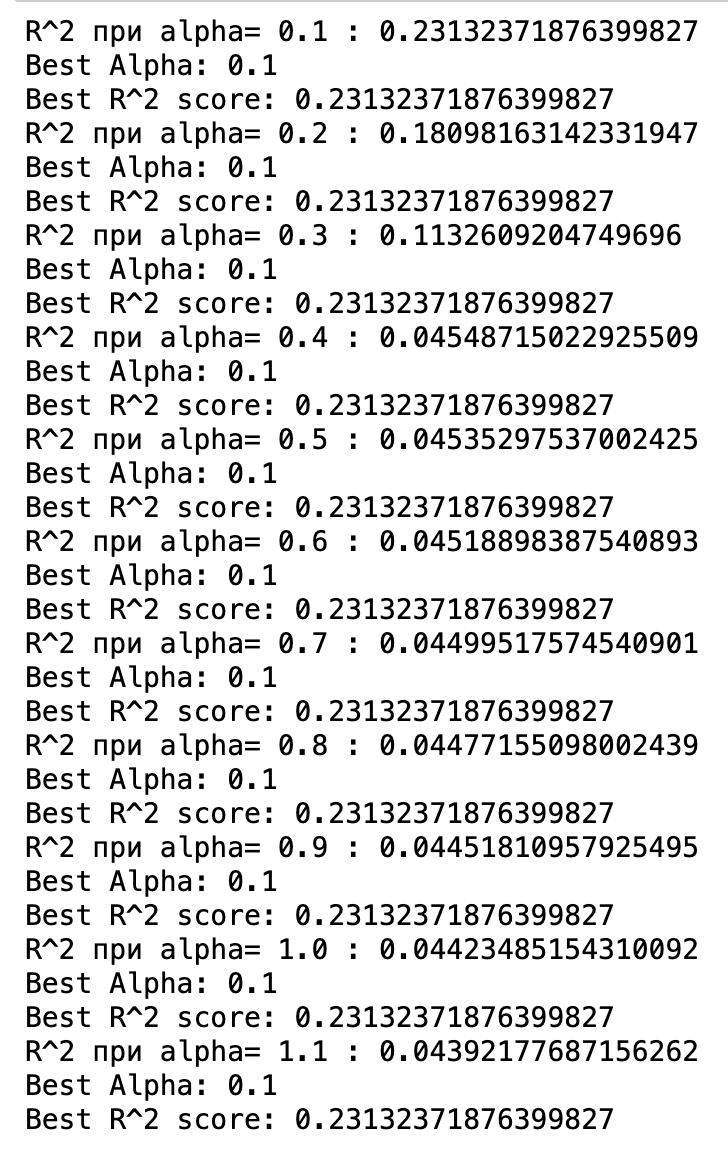

### Шаг 7.  (**0.5 балла**)
Выведите наилучший алгоритм и наилучшее качество по результатам подбора alpha (best_estimator_ и best_score_).

In [14]:
print('Best Alpha:', best_estimator_)
print('Best R^2 score:', best_score_)

Best Alpha: 0.1
Best R^2 score: 0.26672758256516527


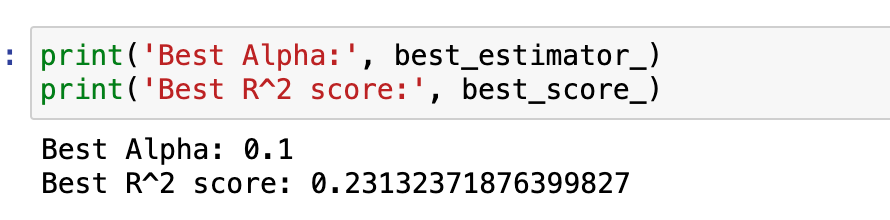

### Шаг 8.  (**0.5 балла**)

С помощью найденного best_estimator_ сделайте предсказание на тестовых данных и выведите на экран r2-score на тесте.

In [15]:
lasso_wine_res = Lasso(alpha=best_estimator_) # задаем регрессию с L1 регуляризацией с нашим параметром alpha
res_test=lasso_wine_res.fit(X_train, y_train)
res_test=lasso_wine_res.predict(X_test)
print('R^2 на test с лучшей alpha:', r2_score(y_test, res_test))

R^2 на test с лучшей alpha: 0.190157031496076


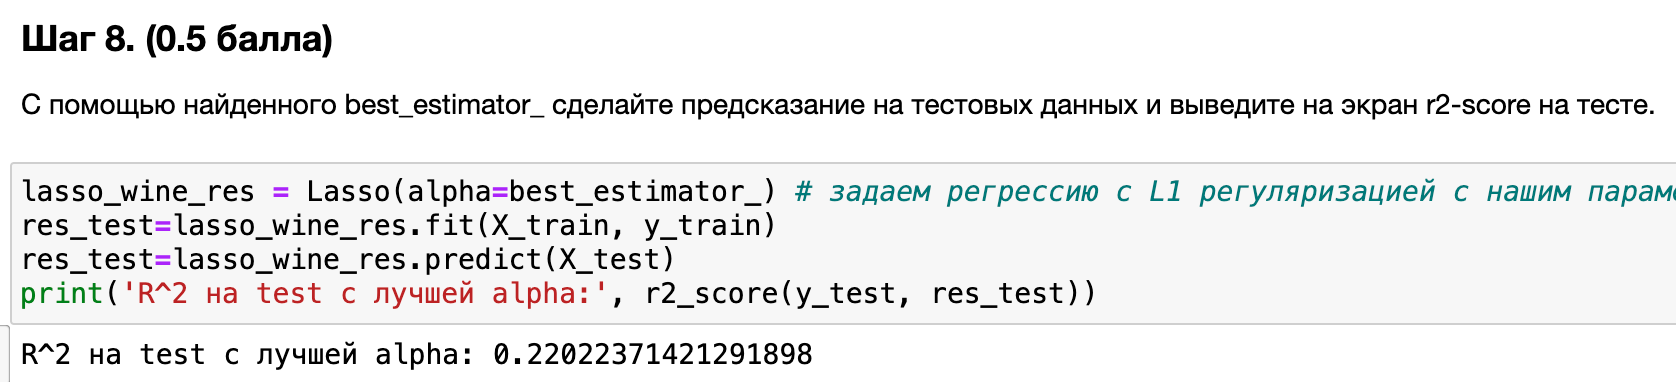

### Шаг 9.  (**0.5 балла**)

Попробуем улучшить качество модели за счет добавления полиномиальных признаков. Создайте pipeline, состоящий из добавления полиномиальных признаков степени 2, а затем применения линейной регрессии.

Затем вычислите r2-score этой модели на кросс валидации с пятью фолдами.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
linear_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)),
                        ('scaler', StandardScaler()),
                       ('lasso', Lasso(alpha=0.1))]) # пишем пайплайн, который сначала будет преобразовывать признаки в полиномиальные, потом скалировать их, а потом фитить в линейную регрессию
cross_val_wine_poly = cross_val_score(linear_pipe, X, y, cv = 5, scoring='r2') # кросс-валидация построенного пайплайн метода c 5-ю фолдами
print(cross_val_wine_poly.mean()) # среднее значение r^2

0.24928125944177837


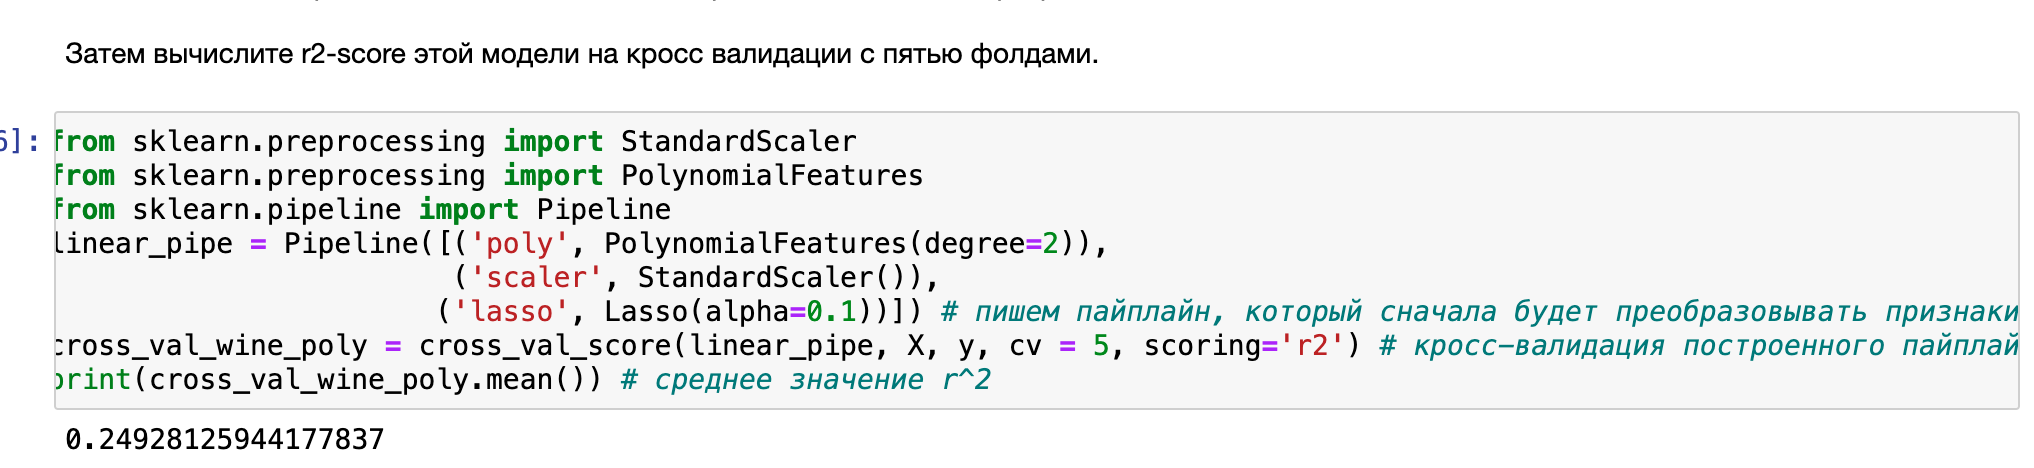

### Шаг 10.  (**0.5 балла**)
Обучите модель (pipeline) на тренировочных данных и сделайте предсказания для train и test, затем выведите на экран r2-score и MSE на тренировочных и на тестовых данных.

In [248]:
linear_pipe.fit(X_train, y_train) # обучаем на трейновых данных полученную модель
linear_pipe.predict(X_test) # предсказываем y на тесте
poly_predict_train = linear_pipe.predict(X_train) # запоминаем предикт для трейна, хотя можно было сразу в принт записать код конечно
poly_predict_test = linear_pipe.predict(X_test) # запоминаем предикт для трейна, хотя можно было сразу в принт записать код конечно
print('R^2 Train:', r2_score(y_train, poly_predict_train)) # 
print('MSE Train:', mean_squared_error(y_train, poly_predict_train)) #
print('R^2 Test:', r2_score(y_test, poly_predict_test)) #
print('MSE Test:', mean_squared_error(y_test, poly_predict_test)) #

R^2 Train: 0.30189781294626095
MSE Train: 0.4518169765755734
R^2 Test: 0.3255122629384887
MSE Test: 0.4444944446374637


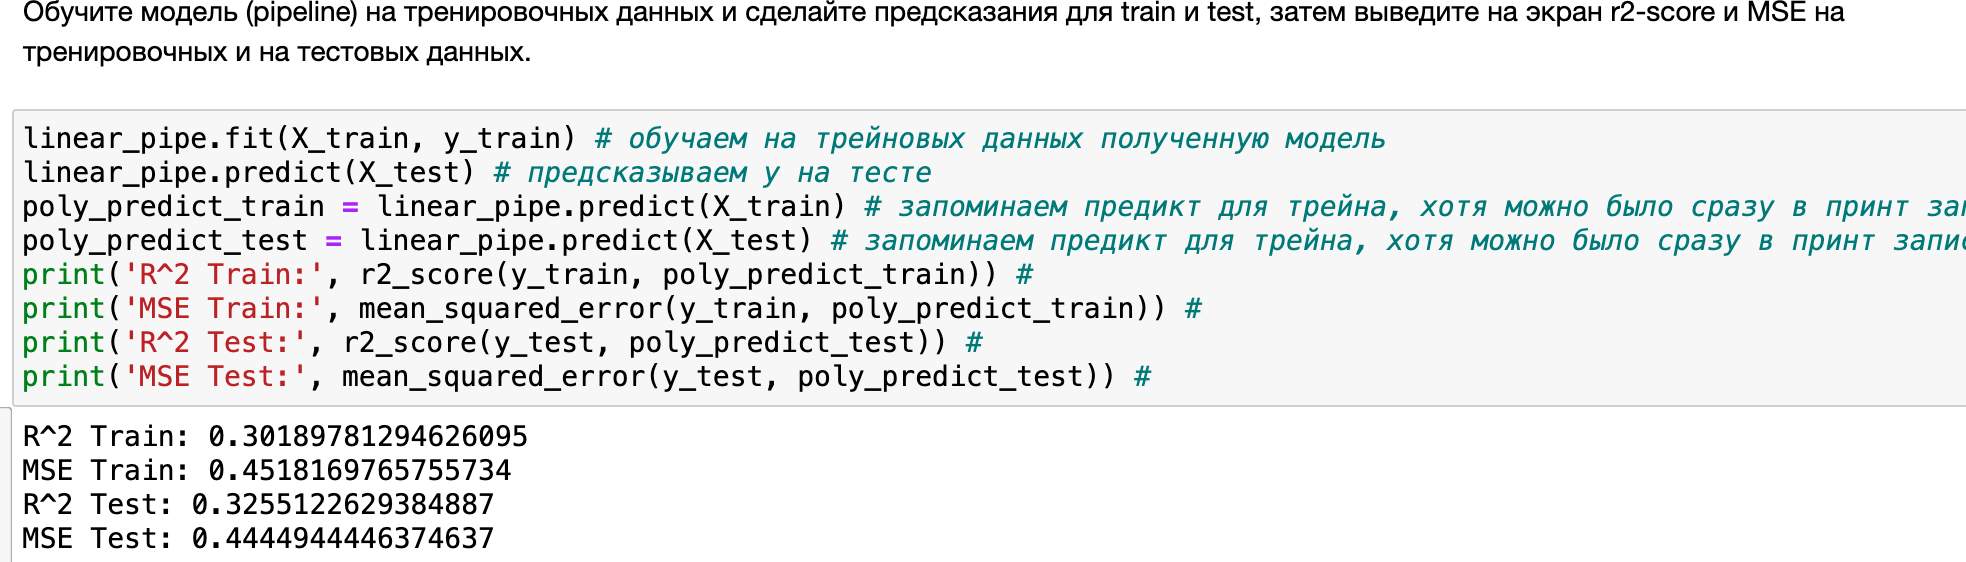

### Сделайте выводы. Для этого ответьте на вопросы: (**1 балл**)

1) Хорошее ли качество показала исходная модель (линейная регрессия без регуляризации)? Является ли эта модель переобученной?

2) Помогла ли L1-регуляризация улучшить качество модели?

3) Помогло ли добавление полиномов второй степени улучшить качество модели? Как добавление новых признаков повлияло на переобучение?

In [246]:
lasso_predict_train = lasso_wine_res.predict(X_train)
lasso_predict_test = lasso_wine_res.predict(X_test)
print('R^2 Train:', r2_score(y_train, lasso_predict_train))
print('MSE Train:', mean_squared_error(y_train, lasso_predict_train))
print('R^2 Test:', r2_score(y_test, lasso_predict_test))
print('MSE Test:', mean_squared_error(y_test, lasso_predict_test))

R^2 Train: 0.23132371876399827
MSE Train: 0.4974930601766911
R^2 Test: 0.22022371421291898
MSE Test: 0.51388069500333


### *Попытайтесь улучшить модель (добейтесь наилучшего качества) - можно использовать любые методы.

При улучшении качества r2 на 0.1-0.2 +1 балл, при большем улучшении +2 балла (дополнительно к 5 баллам за основную часть).

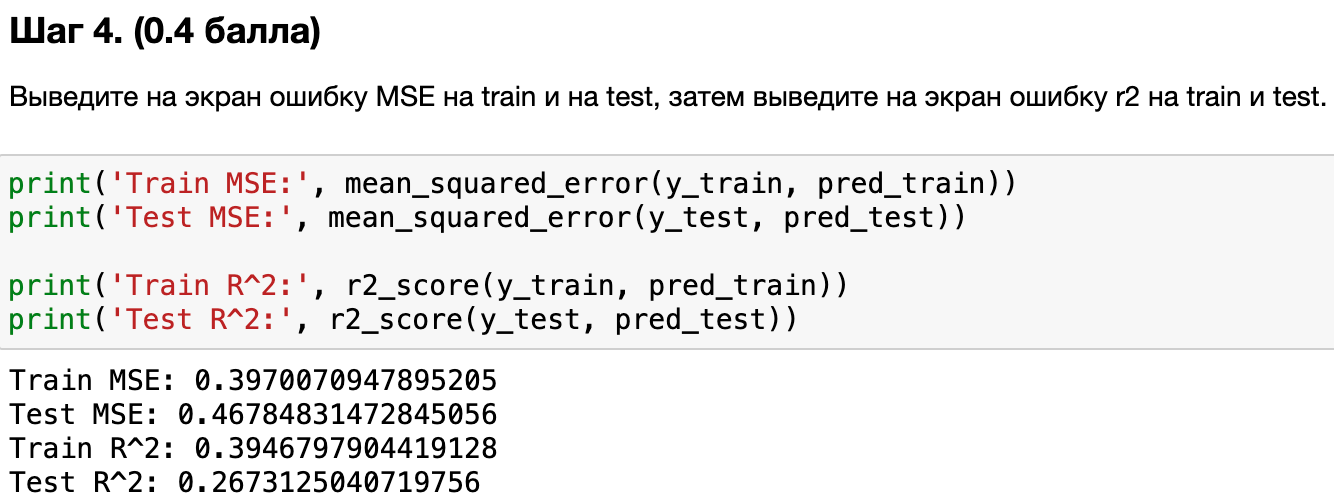

In [17]:
ss = StandardScaler()
X_train_fittr = ss.fit_transform(X_train)
X_test_tran = ss.transform(X_test)

In [106]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import normalize
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.pipeline import FeatureUnion, FunctionTransformer


In [22]:
y_train_xg = y_train - 3
y_test_xg = y_test - 3

In [132]:
param_grid = {'n_estimators': np.arange(40, 51, 1),
              'booster': ['gbtree']}

model_gut = xgb.XGBClassifier(objective="multi:softprob")

grid_search = GridSearchCV(model_gut, param_grid)

grid_search.fit(X_train, y_train_xg)

print("Наилучшие параметры:", grid_search.best_params_)


best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
r2 = r2_score(y_test_xg, y_pred)
print("R^2 на тестовых данных:", r2)

Наилучшие параметры: {'booster': 'gbtree', 'n_estimators': 46}
R^2 на тестовых данных: 0.1614951161984517


In [131]:
Best_model = Pipeline([ ('poly', PolynomialFeatures(degree=2)),
                       ('linear', xgb.XGBClassifier(objective="multi:softprob",  n_estimators=46, booster='gbtree'))])
Best_model.fit(X_train, y_train_xg)
Best_model_train = Best_model.predict(X_train)
Best_model_test = Best_model.predict(X_test)
print('R^2 Train:', r2_score(y_train_xg, Best_model_train))
print('MSE Train:', mean_squared_error(y_train_xg, Best_model_train))
print('R^2 Test:', r2_score(y_test_xg, Best_model_test))
print('MSE Test:', mean_squared_error(y_test_xg, Best_model_test))


R^2 Train: 1.0
MSE Train: 0.0
R^2 Test: 0.30178970765162905
MSE Test: 0.44583333333333336


## Часть 2. Target encoding (**всего 5 баллов**)

В этом части домашнего задания вы будете работать с выборкой `1C`. Вам нужно посчитать счетчики для `item_id` четырьмя способами:

    1) При помощи KFold схемы;  
    2) При помощи Leave-one-out схемы;
    3) При помощи smoothing схемы;
    4) При помощи expanding mean схемы.

### Подготовка данных

In [863]:
sales = pd.read_csv('/Users/yanik/Downloads/sales_train.csv.gz')
sales.columns = ['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'target']
sales

,date,date_block_num,shop_id,item_id,item_price,target
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [1121]:
index_cols = ['shop_id', 'item_id', 'date_block_num']

# For every month we create a grid from all shops/items combinations from that month
grid = [] 
for block_num in sales['date_block_num'].unique():
    cur_shops = sales[sales['date_block_num']==block_num]['shop_id'].unique()
    cur_items = sales[sales['date_block_num']==block_num]['item_id'].unique()
    grid.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))

#turn the grid into pandas dataframe
grid = pd.DataFrame(np.vstack(grid), columns = index_cols,dtype=np.int32)

#get aggregated values for (shop_id, item_id, month)
gb = sales.groupby(index_cols,as_index=False).agg({'target':'sum'})

#join aggregated data to the grid
all_data = pd.merge(grid,gb,how='left',on=index_cols).fillna(0)
#sort the data
all_data.sort_values(['date_block_num','shop_id','item_id'],inplace=True)

In [1122]:
all_data

,shop_id,item_id,date_block_num,target
139255,0,19,0,0.0
141495,0,27,0,0.0
144968,0,28,0,0.0
142661,0,29,0,0.0
138947,0,32,0,6.0
...,...,...,...,...
10768834,59,22162,33,0.0
10769024,59,22163,33,0.0
10769690,59,22164,33,0.0
10771216,59,22166,33,0.0


### Mean encodings без регуляризации

После проделанной технической работы, мы готовы посчитать счетчики для переменной `item_id`. 

Ниже приведены две реализации подсчета счетчиков без регуляризации. Можно использовать данный код в качестве стартовой точки для реализации различных техник регуляризации.

#### Способ 1

In [9]:
# Calculate a mapping: {item_id: target_mean}
item_id_target_mean = all_data.groupby('item_id').target.mean()

# In our non-regularized case we just *map* the computed means to the `item_id`'s
all_data['item_target_enc'] = all_data['item_id'].map(item_id_target_mean)

# Fill NaNs
all_data['item_target_enc'].fillna(0.3343, inplace=True) 

# Print correlation
encoded_feature = all_data['item_target_enc'].values
print(np.corrcoef(all_data['target'].values, encoded_feature)[0][1])

0.4830386988621699


#### Способ 2

In [868]:
'''
     Differently to `.target.mean()` function `transform` 
   will return a dataframe with an index like in `all_data`.
   Basically this single line of code is equivalent to the first two lines from of Method 1.
'''
all_data['item_target_enc'] = all_data.groupby('item_id')['target'].transform('mean')

# Fill NaNs
all_data['item_target_enc'].fillna(0.3343, inplace=True) 

# Print correlation
encoded_feature = all_data['item_target_enc'].values
print(np.corrcoef(all_data['target'].values, encoded_feature)[0][1])

          shop_id  item_id  date_block_num  target  item_target_enc
139255          0       19               0     0.0         0.022222
141495          0       27               0     0.0         0.056834
144968          0       28               0     0.0         0.141176
142661          0       29               0     0.0         0.037383
138947          0       32               0     6.0         1.319042
...           ...      ...             ...     ...              ...
10768834       59    22162              33     0.0         1.556793
10769024       59    22163              33     0.0         0.581395
10769690       59    22164              33     0.0         1.235589
10771216       59    22166              33     0.0         0.295918
10770511       59    22167              33     0.0         1.081081

[10913850 rows x 5 columns]
0.483038698862169


In [853]:
all_data

,shop_id,item_id,date_block_num,target,item_target_enc
139255,0,19,0,0.0,0.022222
141495,0,27,0,0.0,0.056834
144968,0,28,0,0.0,0.141176
142661,0,29,0,0.0,0.037383
138947,0,32,0,6.0,1.319042
...,...,...,...,...,...
10768834,59,22162,33,0.0,1.556793
10769024,59,22163,33,0.0,0.581395
10769690,59,22164,33,0.0,1.235589
10771216,59,22166,33,0.0,0.295918


###  KFold схема (**1.25 балла**)

Необходимо реализовать Kfold схему с пятью фолдами. Используйте KFold(5) из sklearn.model_selection. 

1. Разбейте данные на 5 фолдов при помощи `sklearn.model_selection.KFold` с параметром `shuffle=False`.
2. Проитерируйтесь по фолдам: используйте 4 обучающих фолда для подсчета средних значений таргета по `item_id` и заполните этими значениями валидационный фолд на каждой итерации.

Обратите внимание на **Способ 1** из примера. В частности, изучите, как работают функции map и pd.Series.map. Они довольно полезны во многих ситуациях. 

In [854]:
from sklearn.model_selection import KFold

In [903]:
kf = KFold(n_splits=5, shuffle=False) # создаём разбиение на 5 фолдов без перемешки
encoded_feature_united = [] #
for train_fol, validation_fol in kf.split(all_data): # цикл для перебирания пула из определенных 4 фолдов в качестве тренировочных и одного в качестве валидационного
    train_fold = all_data.iloc[train_fol].copy() # создаём массив из тренировочных четырех фолдов 
    validation_fold = all_data.iloc[validation_fol].copy() #создаём массив из валидационного фолда 
    item_id_target_mean_fold = train_fold.groupby('item_id').target.mean() # группировка в тренировочном фолде по item_id и высчитываем среднее у таргета по каждому соответствующему item_id
    validation_fold['item_target_enc'] = validation_fold['item_id'].map(item_id_target_mean_fold) # заполняем средние значения таргет по каждому item_id в соответвтсвующие item_id валидационной выборки
    encoded_feature = validation_fold['item_target_enc'].values # создаём массив из столбца средних значений из валидационного фолда
    encoded_feature = np.nan_to_num(encoded_feature, nan=0.3343) # заполним наны, тем же, чем заполнялось выш. Потому что если заполнить нулями, то ответ выйдет немного другой, нежели в ожидаемом
    encoded_feature_united = np.concatenate((encoded_feature_united, encoded_feature), axis=0) # создаём полный массив из столбцов всех средних значений из объединённых валидационных фолдов
# You will need to compute correlation like that
corr = np.corrcoef(all_data['target'].values, encoded_feature_united)[0][1] # вычисляем корреляцию
print(corr)
    

0.4164590712798765


Ожидаемый ответ 0.4165

### Leave-one-out схема (**1.25 балла**)

Необходимо реализовать leave-one-out схему . Учтите, если вы запустите код из первого задания, задав количество фолдов такое же как размер выборки, то вы, вероятно, получите правильный ответ, но ждать будете очень-очень долго.

Для более быстрой реализации подсчета среднего таргета на всех объектах, кроме одного, вы можете:

1. Вычислить суммарный таргет по всем объектам.
2. Вычесть таргет конкретного объекта и разделить результат на `n_objects - 1`. 

Заметим, что пункт `1.` следует сделать для всех объектов. Также заметим, что пункт `2.` может быть реализован без циклов `for`.

Здесь может оказаться полезной функция .transform из **Способа 2** из примера.

In [950]:
all_data['item_target_enc'] = all_data.groupby('item_id')['target'].transform(lambda x: (x.sum() - x) / (x.count() - 1)) # группируем данные по item_id, берём именно столбец target. И создаём по ним новый столбец, используя transform через лямбда функцию, где x это группа наблюдений определённого item_id. Ну и соответственно за исключением одного наблюдения высчитываем среднее  
encoded_feature = all_data['item_target_enc'].values # создание массива по столбцу средних значений
corr = np.corrcoef(all_data['target'].values, encoded_feature)[0][1] # подсчёт корреляции 
print(corr)


0.4803848311292993


Ожидаемый ответ 0.4803

### Smoothing (**1.25 балла**)

Необходимо реализовать smoothing с $\alpha = 100$. Используйте формулу:

$\frac{mean(target) \cdot nrows + globalmean \cdot \alpha }{nrows + \alpha}$,

где $globalmean=0.3343$. Заметим, что `nrows` - это количество объектов, принадлежащих конктертной категории, а не количество строк в датасете.

In [945]:
all_data['item_target_enc'] = all_data.groupby('item_id')['target'].transform(lambda x: (x.mean()*x.count()+0.3343*100)/(x.count() + 100)) # логика та же, что и в предыдущем задании, только формула теперь другая
encoded_feature = all_data['item_target_enc'].values # создание массива по столбцу средних значений
corr = np.corrcoef(all_data['target'].values, encoded_feature)[0][1] # подсчёт корреляции
print(corr)

0.48181987970972606


Ожидаемый ответ 0.4818

### Expanding mean схема (**1.25 балла**)

Необходимо реализовать *expanding mean* схему. Ее суть заключается в том, чтобы пройти по отсортированному в определенном порядке датасету (датасет сортируется в самом начале задания) и для подсчета счетчика для строки $m$ использовать строки от $0$ до $m-1$. Вам будет необходимо воспользоваться pandas функциями [`cumsum`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.cumsum.html) и [`cumcount`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.GroupBy.cumcount.html).

In [1156]:
all_data['item_target_enc'] = ((all_data.groupby('item_id')['target'].cumsum() - all_data['target'])/(all_data.groupby('item_id').cumcount())) # вычисляем cumsum внутри группы наблюдений каждого item_id, вычитаем таргет из каждого получившигося значения cumsum для каждого наблюдения, чтобы учесть, что у нас не до m подсчитывается, а до m-1. Ну и потом делим на количество наблюдений для m-1. Поскольку считается с нуля, то менять ничего в методе cumcount не надо. 
all_data['item_target_enc'].fillna(0.3343, inplace=True) # заполним все числа, которые не посчитались 0.3343, это должны быть первые значения в каждой группе, потому что их не по чему считать -> выдаёт NaN
encoded_feature = all_data['item_target_enc'].values # создаём массив элементов из expanded mean столбца
corr = np.corrcoef(all_data['target'].values, encoded_feature)[0][1] # подсчёт корреляции
print(corr)

0.5025245211081657


Ожидаемый ответ 0.5025